In [1]:
import pandas as pd

data=pd.read_csv('Employee-Attrition - Employee-Attrition.csv')
df=data.copy()

#df.isnull().mean()*100
#df.describe()
#df.describe().columns


#To find the outliers
def outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

numerical_column=['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears','WorkLifeBalance', 
       'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

for col in numerical_column:
    outliers = outliers_iqr(df, col)
    print(f"Outliers in {col}: {len(outliers)}")
    #sns.boxplot(x=df[col])
    #plt.title(f'Boxplot for {col}')
    #plt.show()
    
#Scale selected columns (RobustScaler)
from sklearn.preprocessing import RobustScaler
columns_to_treat = [
    'MonthlyIncome','NumCompaniesWorked','PerformanceRating', 'StockOptionLevel',
    'TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion', 
    'YearsWithCurrManager'
    ]

scaler = RobustScaler()
df[columns_to_treat] = scaler.fit_transform(df[columns_to_treat])


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Outliers in Age: 0
Outliers in DailyRate: 0
Outliers in DistanceFromHome: 0
Outliers in Education: 0
Outliers in EnvironmentSatisfaction: 0
Outliers in HourlyRate: 0
Outliers in JobInvolvement: 0
Outliers in JobLevel: 0
Outliers in JobSatisfaction: 0
Outliers in MonthlyIncome: 114
Outliers in MonthlyRate: 0
Outliers in NumCompaniesWorked: 52
Outliers in PercentSalaryHike: 0
Outliers in PerformanceRating: 226
Outliers in RelationshipSatisfaction: 0
Outliers in StockOptionLevel: 85
Outliers in TotalWorkingYears: 63
Outliers in WorkLifeBalance: 0
Outliers in YearsAtCompany: 104
Outliers in YearsInCurrentRole: 21
Outliers in YearsSinceLastPromotion: 107
Outliers in YearsWithCurrManager: 14


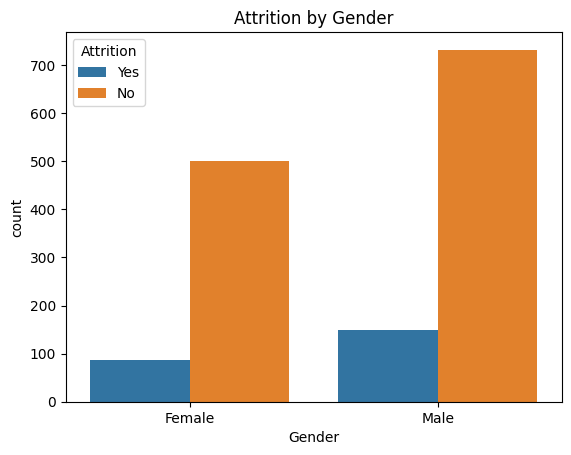

In [ ]:
#EDA:

# Monthly Income vs Attrition
sns.scatterplot(x='Attrition', y='MonthlyIncome', data=df)

# Monthly Income vs Attrition
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)


# Distance from Home by Attrition
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df)

# Years at Company by Department
sns.boxplot(x='Department', y='YearsAtCompany', data=df)

# Age by OverTime
sns.boxplot(x='OverTime', y='Age', data=df)

#Target Variable Distribution
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Count (0 = Stay, 1 = Leave)')
plt.show()

#Univariate Analysis
## Age
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# JobSatisfaction
sns.countplot(x='JobSatisfaction', data=df)
plt.title('Job Satisfaction Distribution')
plt.show()

## Gender
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

# Bivariate Analysis
## Attrition by Gender
sns.countplot(x='Gender', hue='Attrition', data=df)
plt.title('Attrition by Gender')
plt.show()


## Attrition by Department
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition by Department')
plt.show()


## MonthlyIncome vs Attrition
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income by Attrition')
plt.show()

In [3]:

import pickle
from sklearn.preprocessing import LabelEncoder
# Features & target
attrition_features = [
    'Age', 'MonthlyIncome', 'Gender', 'MaritalStatus',
    'JobRole', 'YearsAtCompany', 'YearsInCurrentRole'
]
attrition_target = 'Attrition'

# Drop NA
attrition_df = data[attrition_features + [attrition_target]].dropna()

# Encode categorical
attrition_encoders = {}
for col in ['Gender', 'MaritalStatus', 'JobRole']:
    encoder = LabelEncoder()
    attrition_df[col] = encoder.fit_transform(attrition_df[col])
    attrition_encoders[col] = encoder

# Split features & labels
X_attrition = attrition_df[attrition_features]
y_attrition = attrition_df[attrition_target]

from sklearn.model_selection import train_test_split
# Train-test split
X_attr_train, X_attr_test, y_attr_train, y_attr_test = train_test_split(
    X_attrition, y_attrition, test_size=0.2, random_state=1
)


from sklearn.linear_model import LogisticRegression
# Model training
attr_model = LogisticRegression(max_iter=1000)
attr_model.fit(X_attr_train, y_attr_train)


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Prediction
y_attr_pred = attr_model.predict(X_attr_test)

# Error Metrics
print("\nAttrition Prediction Metrics:")
print("Accuracy:", accuracy_score(y_attr_test, y_attr_pred))
print("Classification Report:\n", classification_report(y_attr_test, y_attr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_attr_test, y_attr_pred))

# Save model & encoders
with open("Attrition_model.pkl", "wb") as f:
    pickle.dump(attr_model, f)

with open("Attrition_encoder.pkl", "wb") as f:
    pickle.dump(attrition_encoders, f)



Attrition Prediction Metrics:
Accuracy: 0.8027210884353742
Classification Report:
               precision    recall  f1-score   support

          No       0.80      1.00      0.89       236
         Yes       0.00      0.00      0.00        58

    accuracy                           0.80       294
   macro avg       0.40      0.50      0.45       294
weighted avg       0.64      0.80      0.71       294

Confusion Matrix:
 [[236   0]
 [ 58   0]]


c:\Users\Dell\Desktop\Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Dell\Desktop\Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Dell\Desktop\Python\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

In [4]:
from sklearn.ensemble import RandomForestRegressor

# Features & target
jobsat_features = ['JobInvolvement', 'WorkLifeBalance', 'JobRole', 'YearsAtCompany']
jobsat_target = 'JobSatisfaction'

# Drop NA
jobsat_df = data[jobsat_features + [jobsat_target]].dropna()

# Encode JobRole
jobrole_encoder = LabelEncoder()
jobsat_df['JobRole'] = jobrole_encoder.fit_transform(jobsat_df['JobRole'])

# Prepare encoder dictionary
jobsat_encoders = {'JobRole': jobrole_encoder}

# Split
X_jobsat = jobsat_df[jobsat_features]
y_jobsat = jobsat_df[jobsat_target]

X_jobsat_train, X_jobsat_test, y_jobsat_train, y_jobsat_test = train_test_split(
    X_jobsat, y_jobsat, test_size=0.2, random_state=42
)

# Train model
jobsat_model = RandomForestRegressor(n_estimators=100, random_state=42)
jobsat_model.fit(X_jobsat_train, y_jobsat_train)


from sklearn.metrics import mean_squared_error, r2_score
# Prediction
y_jobsat_pred = jobsat_model.predict(X_jobsat_test)

#Error Metrics
mse = mean_squared_error(y_jobsat_test, y_jobsat_pred)
r2 = r2_score(y_jobsat_test, y_jobsat_pred)

print("\n Job Satisfaction Prediction Metrics:")
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" R² Score: {r2:.2f}")

# Save model & encoder
with open("JobSat_model.pkl", "wb") as f:
    pickle.dump(jobsat_model, f)

with open("JobSat_encoder.pkl", "wb") as f:
    pickle.dump(jobsat_encoders, f)



 Job Satisfaction Prediction Metrics:
 Mean Squared Error (MSE): 1.62
 R² Score: -0.28


In [5]:
import streamlit as st
import pandas as pd
import pickle

# Load models and encoders
Attrition_model = pickle.load(open("Attrition_model.pkl", "rb"))
Attrition_encoder = pickle.load(open("Attrition_encoder.pkl", "rb"))

JobSat_model = pickle.load(open("JobSat_model.pkl", "rb"))
JobSat_encoder = pickle.load(open("JobSat_encoder.pkl", "rb"))

# Define feature order for Attrition model
selected_features = [
    'Age', 'MonthlyIncome', 'Gender', 'MaritalStatus',
    'JobRole', 'YearsAtCompany', 'YearsInCurrentRole'
]

st.set_page_config(page_title="Employee Attrition & Job Satisfaction", page_icon="🧠")
st.title("Employee Attrition & Job Satisfaction Predictor")
st.markdown("Use this app to predict **Attrition likelihood** and **Job Satisfaction level** of employees.")

with st.form("input_form"):
    st.subheader(" Enter Employee Data")

    # Inputs (shared across models)
    age = st.number_input("Age", min_value=18, max_value=65, value=30)
    gender = st.selectbox("Gender", ["Male", "Female"])
    jobrole = st.selectbox("Job Role", [
        "Sales Executive", "Research Scientist", "Laboratory Technician",
        "Manufacturing Director", "Healthcare Representative", "Manager",
        "Sales Representative", "Research Director", "Human Resources"
    ])
    income = st.number_input("Monthly Income", min_value=1000, max_value=50000, value=5000)
    marital_status = st.selectbox("Marital Status", ["Single", "Married"])
    years_at_company = st.slider("Years at Company", 0, 40, 5)
    years_in_role = st.slider("Years in Current Role", 0, 20, 2)

    # Job Satisfaction-specific inputs
    job_involvement = st.slider("Job Involvement (1 - Low to 4 - High)", 1, 4, 3)
    work_life_balance = st.slider("Work-Life Balance (1 - Bad to 4 - Excellent)", 1, 4, 3)

    submit = st.form_submit_button("🚀 Predict Now")

if submit:
    try:
        # -------------------- ATTRITION PREDICTION --------------------
        gender_enc = Attrition_encoder['Gender'].transform([gender])[0]
        jobrole_enc = Attrition_encoder['JobRole'].transform([jobrole])[0]
        marital_enc = Attrition_encoder['MaritalStatus'].transform([marital_status])[0]

        attr_input = {
            'Age': age,
            'MonthlyIncome': income,
            'Gender': gender_enc,
            'MaritalStatus': marital_enc,
            'JobRole': jobrole_enc,
            'YearsAtCompany': years_at_company,
            'YearsInCurrentRole': years_in_role
        }

        attr_df = pd.DataFrame([attr_input])[selected_features]
        prediction = Attrition_model.predict(attr_df)[0]
        probability = Attrition_model.predict_proba(attr_df)[0][1]  # Probability of leaving

        st.subheader(" Attrition Prediction")
        if prediction == 1:
            st.error(f" This employee is likely to leave. (Probability: {probability:.2%})")
        else:
            st.success(f" This employee is likely to stay. (Probability of leaving: {probability:.2%})")

        # -------------------- JOB SATISFACTION PREDICTION --------------------
        jobrole_js_enc = JobSat_encoder['JobRole'].transform([jobrole])[0]

        job_sat_input = {
            'JobInvolvement': job_involvement,
            'WorkLifeBalance': work_life_balance,
            'JobRole': jobrole_js_enc,
            'YearsAtCompany': years_at_company
        }

        job_sat_df = pd.DataFrame([job_sat_input])
        job_sat_score = JobSat_model.predict(job_sat_df)[0]

        st.subheader(" Job Satisfaction Prediction")
        st.info(f" Predicted Job Satisfaction Level: **{job_sat_score:.2f}** (Scale: 1 to 4)")

        if job_sat_score < 2.5:
            st.warning(" Low satisfaction! Consider interventions for retention.")
        elif job_sat_score >= 3.5:
            st.success(" Employee is likely highly satisfied!")
        else:
            st.info(" Moderate satisfaction level.")

    except Exception as e:
        st.error(f"Error during prediction: {e}")


2025-07-29 17:32:23.271 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 17:32:23.271 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 17:32:24.465 
  command:

    streamlit run c:\Users\Dell\Desktop\Python\.venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-29 17:32:24.465 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 17:32:24.465 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 17:32:24.465 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-29 17:32:24.465 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored